<a href="https://colab.research.google.com/github/Adarsh0027/BA01/blob/main/16_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop("Outcome",1)

<ipython-input-4-01634d1e1778>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop("Outcome",1)


In [6]:
y=df.Outcome 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree=DecisionTreeClassifier()
tree=tree.fit(X_train,y_train)
predictedy=tree.predict(X_test)

In [37]:
from sklearn import metrics 
accuracy=metrics.accuracy_score(y_test,predictedy)
print(accuracy*100)

70.995670995671


In [26]:
from sklearn.tree import export_graphviz
from io import StringIO

In [31]:
dotdata=StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,special_characters=True,class_names=['O','I'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>1</SUB> &le; 127.5<br/>gini = 0.45<br/>samples = 537<br/>value = [353, 184]<br/>class = O>, fillcolor="#f3c3a0"] ;
1 [label=<X<SUB>7</SUB> &le; 28.5<br/>gini = 0.291<br/>samples = 334<br/>value = [275, 59]<br/>class = O>, fillcolor="#eb9c63"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>5</SUB> &le; 30.9<br/>gini = 0.162<br/>samples = 191<br/>value = [174, 17]<br/>class = O>, fillcolor="#e88d4c"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 7.5<br/>gini = 0.037<br/>samples = 107<br/>value = [105, 2]<br/>class = O>, fillcolor="#e5833d"] ;
2 -> 3 ;
4 [label=<X<SUB>6</SUB> &le; 0.668<br/>gini = 0.019<br/>samples = 106<br/>value = [105, 1]<br/>class = O>, fillcolor="#e5823b"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 92<br/>value = [92, 0]<br/>class = O>, fillcolor="#e58139"] ;
4 -> 5 ;
6 [label=<X<SUB>6</SUB> &le; 0.686<br/>

In [32]:
import pydotplus as pp
graph=pp.graph_from_dot_data(dotdata.getvalue())
graph.write_png("tree_for_diabetes.png")

True

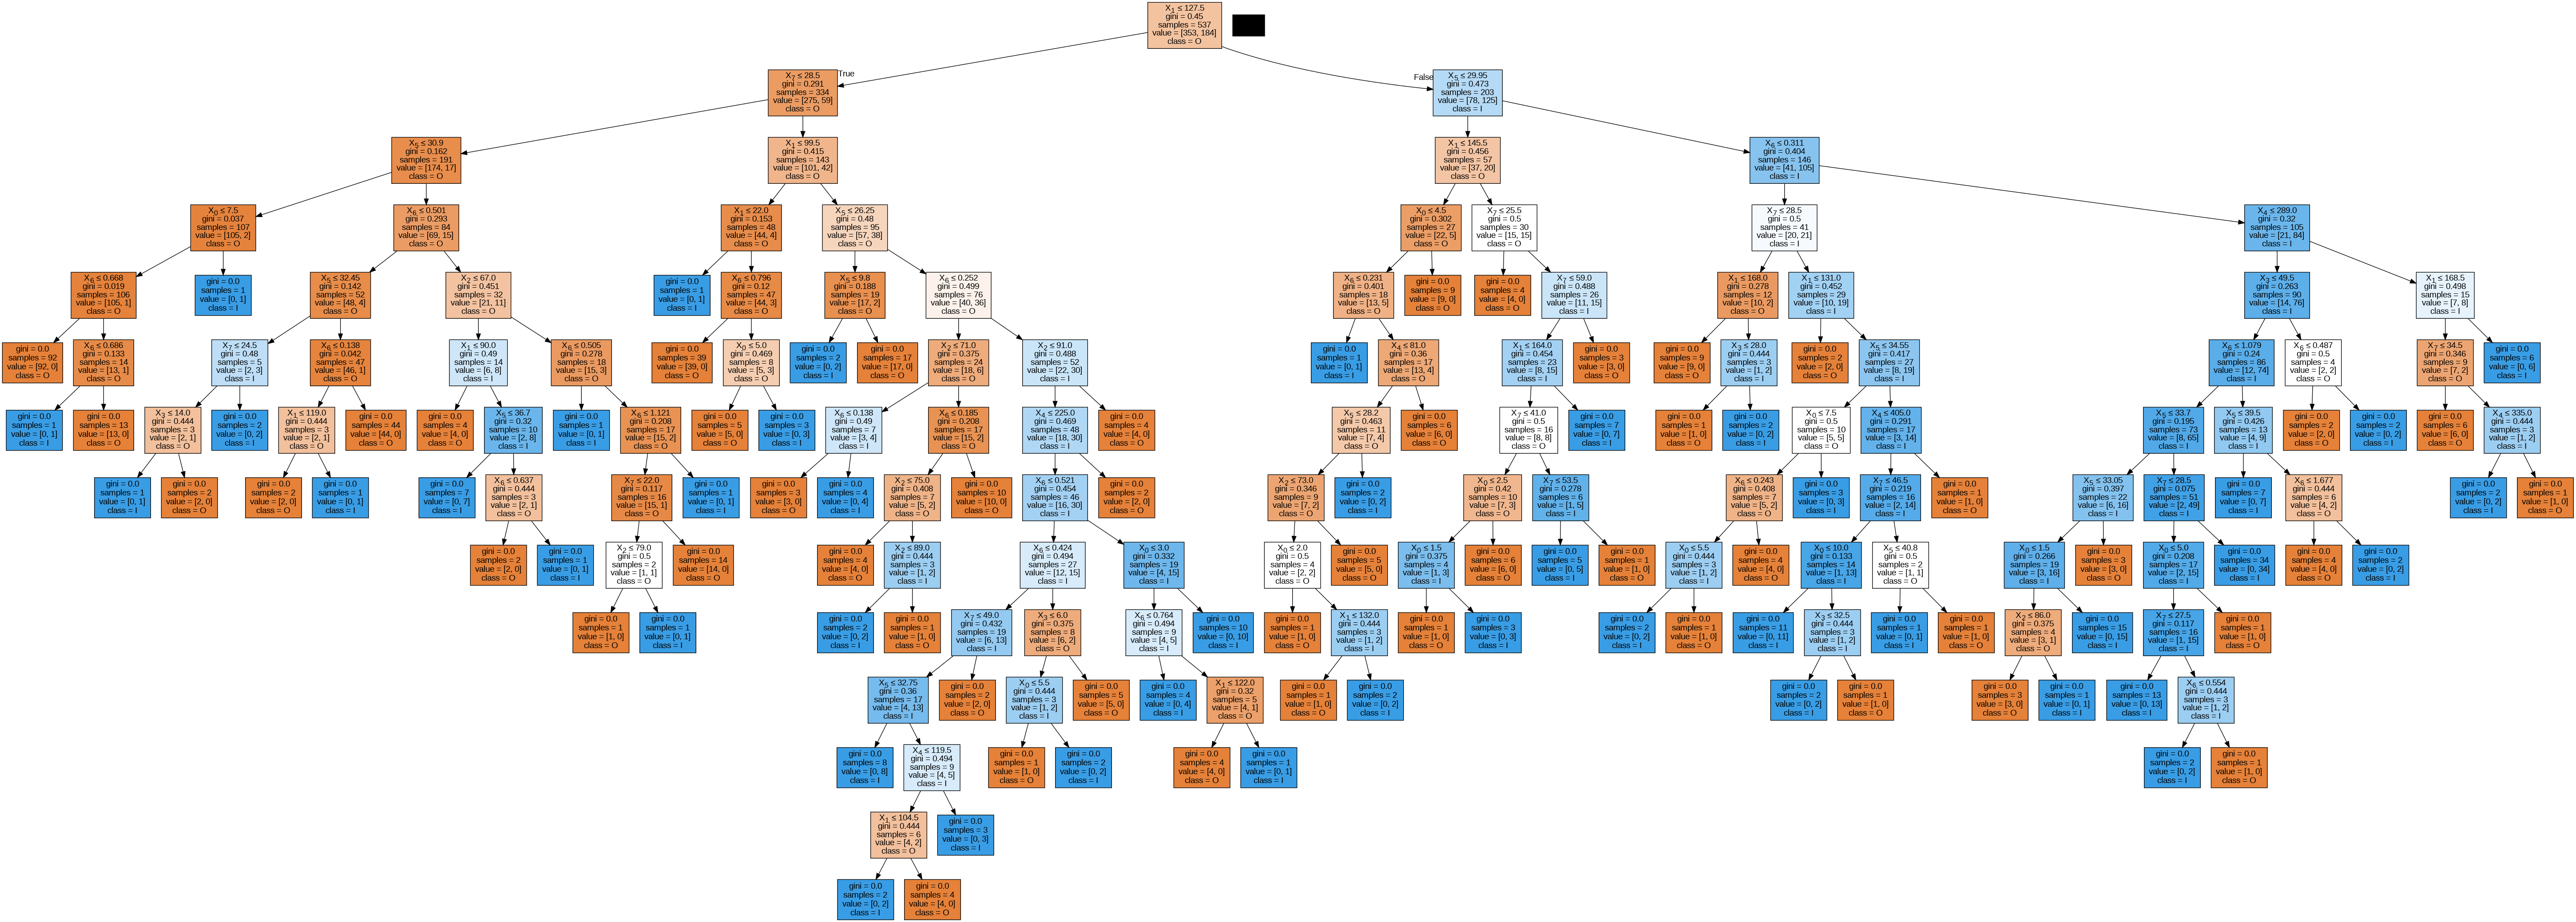

In [33]:
from IPython.display import Image
Image(graph.create_png())